# 1. Pre-requisites
## 1.1 Import packages

In [1]:
import scanpy as sc
import pandas as pd
import cellxgene_census
import anndata as ad
import tiledbsoma as soma
from tiledbsoma.experiment_query import X_as_series
import numpy as np

## 1.2 Read in data

In [96]:
#read in Tabula Sapiens Atlas for all cells
tabula = sc.read_h5ad('tabula_sapiens_all_cells.h5ad')

tabula

AnnData object with n_obs × n_vars = 483152 × 58604
    obs: 'tissue_in_publication', 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_id_c

# 2. Querying data 
## 2.1 Structure of data

In [4]:
#look at metadata observations
tabula.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,HsapDv:0000161,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,529,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2753,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,984,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage


This shows the metadata for the cells and confirms the presence of 483,152 cells. We want to capture the `cell_type` from this metadata.

In [15]:
tabula.obs['cell_type']

AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                                                      macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                                                        monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                            endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                                                      macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                                            liver dendritic cell
                                                                                  ...                 
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364                        endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365                        endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367                        endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368           

There are 160 different cell types identified so may be best to start with tissue data.

In [16]:
tabula.obs['tissue']

AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                            liver
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                            liver
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                            liver
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                            liver
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                            liver
                                                                  ...  
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364    aorta
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365    aorta
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367    aorta
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368    aorta
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P9_S369    aorta
Name: tissue, Length: 483152, dtype: category
Categories (45, object): ['endocrine pancreas', 'exocrine pancreas', 'lymph node', 'large intestine', ..., 'muscle of pelvic diaphragm', 'anterior part of tongue'

There are 45 identified tissue types so will start with these instead.

In [7]:
#look at data entries for genes
tabula.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype
ensemblid,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,6.398244e-05,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene
ENSG00000227232,Gene Expression,False,2.274395e-03,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene
ENSG00000278267,Gene Expression,False,6.175251e-05,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene
ENSG00000243485,Gene Expression,False,1.372886e-04,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000284332,Gene Expression,False,1.000000e-12,NaN,0.000000,0.000000,1.000000,False,MIR1302-2,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,9.634841e-01,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene
ENSG00000210194,Gene Expression,False,1.600667e-01,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene
ENSG00000198727,Gene Expression,False,4.367693e+00,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene


This table shows each individual gene measured in the human cells (58,604 genes) and its mean expression???? across the cells. We want the `ensemblid` for these genes to identify them but the actual gene name is `feature_name`.

`tabula.X` contains the log1p normalised and scaled decontX corrected counts for each gene for each cell.

# 3. Normalised and scaled count data

In [97]:
tabula_counts = pd.DataFrame.sparse.from_spmatrix(tabula.X)

In [98]:
#add gene names
gene_names = tabula.var['feature_name'].values.to_list()

tabula_counts = tabula_counts.set_axis(gene_names, axis = 1)

/tmp/ipykernel_1665/2122468128.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  gene_names = tabula.var['feature_name'].values.to_list()


In [99]:
#add cell type
all_cell_type = tabula.obs['cell_type'].values.to_list()

tabula_counts.insert(0, 'cell_type', all_cell_type)

/tmp/ipykernel_1665/2057349549.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  all_cell_type = tabula.obs['cell_type'].values.to_list()


In [100]:
tabula_counts

,cell_type,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,OR4F5,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.0,0.0,0.0,3.066113,1.735281,0.0,4.651200,0.0,0.000000
1,monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.0,0.0,0.0,3.011087,0.000000,0.0,4.890568,0.0,0.000000
2,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.0,0.0,0.0,3.832069,1.114132,0.0,4.693941,0.0,0.000000
3,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.0,0.0,0.0,2.975372,0.000000,0.0,4.572667,0.0,0.000000
4,liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.0,0.0,0.0,3.143889,0.000000,0.0,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483147,endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.455786,0.0,0.0,0.0,2.986555,0.760420,0.0,2.158757,0.0,0.000000
483148,endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.292184,0.0,0.0,0.0,3.560022,2.219024,0.0,3.486868,0.0,0.000000
483149,endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.031555,0.0,0.0,0.0,4.286012,2.549905,0.0,3.976863,0.0,5.355007
483150,endothelial cell,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.405994,0.0,0.0,0.0,4.814424,4.026218,0.0,3.945915,0.0,0.000000


In [ ]:
tabula_counts.groupby(['cell_type']).mean() #too long to compute

In [ ]:
tabula_counts.groupby(['cell_type']).sum() #too long to compute

# Census API

# Liver

# 1. Generate data subset
## 1.1 Search census

In [2]:
census = cellxgene_census.open_soma()

The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.


In [3]:
#fetch human RNA experiments
human = census["census_data"]["homo_sapiens"]
human_rna = human.ms["RNA"]

In [4]:
#fetch datasets
datasets_df = census["census_info"]["datasets"].read().concat().to_pandas()

datasets_df

,soma_joinid,collection_id,collection_name,collection_doi,dataset_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
0,0,e2c257e7-6f79-487c-b81c-39451cd4ab3c,Spatial multiomics map of trophoblast developm...,10.1038/s41586-023-05869-0,f171db61-e57e-4535-a06a-35d8b6ef8f2b,donor_p13_trophoblasts,f171db61-e57e-4535-a06a-35d8b6ef8f2b.h5ad,31497
1,1,e2c257e7-6f79-487c-b81c-39451cd4ab3c,Spatial multiomics map of trophoblast developm...,10.1038/s41586-023-05869-0,ecf2e08e-2032-4a9e-b466-b65b395f4a02,All donors trophoblasts,ecf2e08e-2032-4a9e-b466-b65b395f4a02.h5ad,67070
2,2,e2c257e7-6f79-487c-b81c-39451cd4ab3c,Spatial multiomics map of trophoblast developm...,10.1038/s41586-023-05869-0,74cff64f-9da9-4b2a-9b3b-8a04a1598040,All donors all cell states (in vivo),74cff64f-9da9-4b2a-9b3b-8a04a1598040.h5ad,286326
3,3,f7cecffa-00b4-4560-a29a-8ad626b8ee08,Mapping single-cell transcriptomes in the intr...,10.1016/j.ccell.2022.11.001,5af90777-6760-4003-9dba-8f945fec6fdf,Single-cell transcriptomic datasets of Renal c...,5af90777-6760-4003-9dba-8f945fec6fdf.h5ad,270855
4,4,3f50314f-bdc9-40c6-8e4a-b0901ebfbe4c,Single-cell sequencing links multiregional imm...,10.1016/j.ccell.2021.03.007,bd65a70f-b274-4133-b9dd-0d1431b6af34,Single-cell sequencing links multiregional imm...,bd65a70f-b274-4133-b9dd-0d1431b6af34.h5ad,167283
...,...,...,...,...,...,...,...,...
588,588,180bff9c-c8a5-4539-b13b-ddbc00d643e6,Molecular characterization of selectively vuln...,10.1038/s41593-020-00764-7,f9ad5649-f372-43e1-a3a8-423383e5a8a2,Molecular characterization of selectively vuln...,f9ad5649-f372-43e1-a3a8-423383e5a8a2.h5ad,8168
589,589,a72afd53-ab92-4511-88da-252fb0e26b9a,Single-cell atlas of peripheral immune respons...,10.1038/s41591-020-0944-y,456e8b9b-f872-488b-871d-94534090a865,Single-cell atlas of peripheral immune respons...,456e8b9b-f872-488b-871d-94534090a865.h5ad,44721
590,590,38833785-fac5-48fd-944a-0f62a4c23ed1,Construction of a human cell landscape at sing...,10.1038/s41586-020-2157-4,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,Construction of a human cell landscape at sing...,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf.h5ad,598266
591,591,5d445965-6f1a-4b68-ba3a-b8f765155d3a,A molecular cell atlas of the human lung from ...,10.1038/s41586-020-2922-4,e04daea4-4412-45b5-989e-76a9be070a89,"Krasnow Lab Human Lung Cell Atlas, Smart-seq2",e04daea4-4412-45b5-989e-76a9be070a89.h5ad,9409


In [5]:
#search for Tabula Sapiens Dataset
datasets_df[datasets_df['collection_doi'] == '10.1126/science.abl4896'].sort_values(by = 'dataset_total_cell_count', 
                                                                                    ascending = True)

,soma_joinid,collection_id,collection_name,collection_doi,dataset_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
18,18,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,6d41668c-168c-4500-b06a-4674ccf3e19d,Tabula Sapiens - Liver,6d41668c-168c-4500-b06a-4674ccf3e19d.h5ad,5007
17,17,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,6ec405bb-4727-4c6d-ab4e-01fe489af7ea,Tabula Sapiens - Uterus,6ec405bb-4727-4c6d-ab4e-01fe489af7ea.h5ad,7124
28,28,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,0041b9c3-6a49-4bf7-8514-9bc7190067a7,Tabula Sapiens - Skin,0041b9c3-6a49-4bf7-8514-9bc7190067a7.h5ad,9424
9,9,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,d8732da6-8d1d-42d9-b625-f2416c30054b,Tabula Sapiens - Trachea,d8732da6-8d1d-42d9-b625-f2416c30054b.h5ad,9522
23,23,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,2423ce2c-3149-4cca-a2ff-cf682ea29b5f,Tabula Sapiens - Kidney,2423ce2c-3149-4cca-a2ff-cf682ea29b5f.h5ad,9641
14,14,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,a0754256-f44b-4c4a-962c-a552e47d3fdc,Tabula Sapiens - Eye,a0754256-f44b-4c4a-962c-a552e47d3fdc.h5ad,10650
22,22,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,2ba40233-8576-4dec-a5f1-2adfa115e2dc,Tabula Sapiens - Mammary,2ba40233-8576-4dec-a5f1-2adfa115e2dc.h5ad,11375
7,7,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,e6a11140-2545-46bc-929e-da243eed2cae,Tabula Sapiens - Heart,e6a11140-2545-46bc-929e-da243eed2cae.h5ad,11505
21,21,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,4f1555bc-4664-46c3-a606-78d34dd10d92,Tabula Sapiens - Bone_Marrow,4f1555bc-4664-46c3-a606-78d34dd10d92.h5ad,12297
12,12,e5f58829-1a66-40b5-a624-9046778e74f5,Tabula Sapiens,10.1126/science.abl4896,a357414d-2042-4eb5-95f0-c58604a18bdd,Tabula Sapiens - Small_Intestine,a357414d-2042-4eb5-95f0-c58604a18bdd.h5ad,12467


In [34]:
presence_matrix = cellxgene_census.get_presence_matrix(census, organism="Homo sapiens", measurement_name="RNA")

presence_matrix

<593x60664 sparse matrix of type '<class 'numpy.uint8'>'
	with 16133717 stored elements in Compressed Sparse Row format>

In [36]:
var_df = human_rna.var.read().concat().to_pandas()

var_df

,soma_joinid,feature_id,feature_name,feature_length
0,0,ENSG00000121410,A1BG,3999
1,1,ENSG00000268895,A1BG-AS1,3374
2,2,ENSG00000148584,A1CF,9603
3,3,ENSG00000175899,A2M,6318
4,4,ENSG00000245105,A2M-AS1,2948
...,...,...,...,...
60659,60659,ENSG00000288719,RP4-669P10.21,4252
60660,60660,ENSG00000288720,RP11-852E15.3,7007
60661,60661,ENSG00000288721,RP5-973N23.5,7765
60662,60662,ENSG00000288723,RP11-553N16.6,1015


The presence matrix is indexed by `soma_joinid`: the first dimension is the **datasets** `soma_joinid` as in the `census_datasets` and the second dimension is the **feature's** `soma_joinid` as in the `var` dataframe

## 1.2 Download data subset

Liver has the smallest number of cells (5007) within the Tabula Sapiens dataset so we'll subset these and start analysis here first.

In [29]:
cellxgene_census.download_source_h5ad(dataset_id = '6d41668c-168c-4500-b06a-4674ccf3e19d', 
                                              to_path = '/home/jupyter/tabula_sapiens_liver.h5ad')

In [2]:
liver = sc.read_h5ad('tabula_sapiens_liver.h5ad')

In [33]:
liver

AnnData object with n_obs × n_vars = 5007 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'den

## 1.3 Identifying all genes measured in the liver dataset

In [37]:
#slice dataset of interest and get the joinid (unqiue dataset index in the census)
dataset_joinid = datasets_df.loc[datasets_df.dataset_id == '6d41668c-168c-4500-b06a-4674ccf3e19d'].soma_joinid

#slice presence (gene) matrix by first dimension which is dataset
var_joinids = presence_matrix[dataset_joinid, :].tocoo().col

#from the 
var_df.loc[var_df.soma_joinid.isin(var_joinids)]

,soma_joinid,feature_id,feature_name,feature_length
0,0,ENSG00000121410,A1BG,3999
1,1,ENSG00000268895,A1BG-AS1,3374
2,2,ENSG00000148584,A1CF,9603
3,3,ENSG00000175899,A2M,6318
4,4,ENSG00000245105,A2M-AS1,2948
...,...,...,...,...
58621,58621,ENSG00000210184,MT-TS2,59
58622,58622,ENSG00000210191,MT-TL2,71
58623,58623,ENSG00000210194,MT-TE,69
58624,58624,ENSG00000210195,MT-TT,66


# 2. Querying Data
## 2.1 Liver Metadata

In [42]:
liver.obs

,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,sex_ontology_term_id,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,EFO:0009922,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,PATO:0000384,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,PATO:0000384,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,EFO:0009922,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,PATO:0000384,...,HsapDv:0000161,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,EFO:0009922,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,PATO:0000384,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,EFO:0009922,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,PATO:0000384,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,EFO:0009922,TSP14,nan,32707.0,4815,hepatocyte,Hepatocyte,True,epithelial,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,hepatocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,59-year-old human stage
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,EFO:0009922,TSP14,nan,19864.0,3526,hepatocyte,Hepatocyte,True,epithelial,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,hepatocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,59-year-old human stage
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,EFO:0009922,TSP14,nan,2550.0,1389,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,PATO:0000384,...,HsapDv:0000153,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,59-year-old human stage


## 2.2 Liver Feature Data (same as all cells feature mean counts)

In [43]:
liver.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,ensembl_version,feature_is_filtered,feature_name,feature_reference,feature_biotype
ensemblid,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,6.398244e-05,0.835044,-0.573947,0.000039,0.005574,ENSG00000223972.5,False,DDX11L1,NCBITaxon:9606,gene
ENSG00000227232,Gene Expression,False,2.274395e-03,2.442280,0.533203,0.001080,0.031731,ENSG00000227232.5,False,WASH7P,NCBITaxon:9606,gene
ENSG00000278267,Gene Expression,False,6.175251e-05,1.295335,-0.256874,0.000033,0.005634,ENSG00000278267.1,False,MIR6859-1,NCBITaxon:9606,gene
ENSG00000243485,Gene Expression,False,1.372886e-04,2.656352,0.680668,0.000048,0.008041,ENSG00000243485.5,False,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000284332,Gene Expression,False,1.000000e-12,NaN,0.000000,0.000000,1.000000,ENSG00000284332.1,False,MIR1302-2,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,9.634841e-01,2.466404,0.154140,0.590065,0.741395,ENSG00000198695.2,False,MT-ND6,NCBITaxon:9606,gene
ENSG00000210194,Gene Expression,False,1.600667e-01,1.603787,-0.044396,0.083929,0.301820,ENSG00000210194.1,False,MT-TE,NCBITaxon:9606,gene
ENSG00000198727,Gene Expression,False,4.367693e+00,4.765751,-0.499747,3.874830,1.104192,ENSG00000198727.2,False,MT-CYB,NCBITaxon:9606,gene


# 3. Normalised feature count matrix with feature_name
## 3.1 Normalised feature counts in each cell from liver

In [49]:
print(liver.X) #log1p normalised and scaled decontX corrected counts

  (0, 38)	2.3135314
  (0, 137)	2.017924
  (0, 148)	1.7682451
  (0, 197)	2.9146569
  (0, 229)	1.7524959
  (0, 256)	1.6055938
  (0, 266)	1.9191335
  (0, 273)	1.1627396
  (0, 297)	0.94154125
  (0, 332)	2.2555065
  (0, 350)	2.5699217
  (0, 364)	3.0685349
  (0, 366)	1.6374199
  (0, 386)	4.1950088
  (0, 416)	3.1584241
  (0, 420)	2.244354
  (0, 423)	1.790217
  (0, 477)	2.259219
  (0, 492)	2.2818408
  (0, 518)	1.5732617
  (0, 541)	1.986201
  (0, 581)	3.7468507
  (0, 612)	2.1255298
  (0, 623)	1.2339125
  (0, 625)	2.1744208
  :	:
  (5006, 57216)	10.0
  (5006, 57306)	3.2512813
  (5006, 57363)	1.8781296
  (5006, 57371)	1.8061343
  (5006, 57464)	10.0
  (5006, 57597)	6.4817824
  (5006, 57700)	10.0
  (5006, 58107)	6.480399
  (5006, 58241)	5.1344576
  (5006, 58332)	10.0
  (5006, 58348)	4.1966047
  (5006, 58351)	6.4616237
  (5006, 58568)	2.2135978
  (5006, 58570)	3.0771492
  (5006, 58572)	0.0
  (5006, 58576)	0.0
  (5006, 58582)	0.0
  (5006, 58585)	1.4261405
  (5006, 58588)	2.0721047
  (5006, 58589)	2.1

Compared to the whole cell dataset we see that the index only goes as far as 5006 since there are only 5007 cells in this sample.

In [3]:
#convert sparse matrix into pandas dataframe
liver_counts = pd.DataFrame.sparse.from_spmatrix(liver.X)

liver_counts

,0,1,2,3,4,5,6,7,8,9,...,58594,58595,58596,58597,58598,58599,58600,58601,58602,58603
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.000000,0.000000,0.0,3.066113,1.735281,0.000000,4.651200,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.000000,0.000000,0.0,3.011087,0.000000,0.000000,4.890568,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.000000,0.000000,0.0,3.832069,1.114132,0.000000,4.693941,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.000000,0.000000,0.0,2.975372,0.000000,0.000000,4.572667,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.000000,0.000000,0.0,3.143889,0.000000,0.000000,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.577865,1.506503,0.792537,0.0,3.344307,1.543429,0.883882,4.122873,0.0,2.078453
5003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.099157,0.000000,1.211337,0.0,2.707354,0.939532,4.610079,3.635269,0.0,1.836136
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.973971,0.0,0.000000
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.335147,0.000000,0.000000,0.0,1.490789,0.000000,0.000000,2.239632,0.0,0.000000


In [4]:
#add gene names
gene_names = liver.var['feature_name'].values.to_list()

liver_counts = liver_counts.set_axis(gene_names, axis = 1)

/tmp/ipykernel_11744/3747516722.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  gene_names = liver.var['feature_name'].values.to_list()


In [5]:
#add cell type
cell_type = liver.obs['cell_ontology_class'].values.to_list()

liver_counts.insert(0, 'cell_type', cell_type)

/tmp/ipykernel_11744/1667413443.py:2: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cell_type = liver.obs['cell_ontology_class'].values.to_list()


In [6]:
#add cell_id
cell_id = liver.obs.index.values
liver_counts.insert(0, 'cell_id', cell_id)

In [7]:
liver_counts

,cell_id,cell_type,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,MIR1302-2,FAM138A,OR4G4P,OR4G11P,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.000000,0.000000,0.0,3.066113,1.735281,0.000000,4.651200,0.0,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.000000,0.000000,0.0,3.011087,0.000000,0.000000,4.890568,0.0,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.000000,0.000000,0.0,3.832069,1.114132,0.000000,4.693941,0.0,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.000000,0.000000,0.0,2.975372,0.000000,0.000000,4.572667,0.0,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.000000,0.000000,0.0,3.143889,0.000000,0.000000,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.577865,1.506503,0.792537,0.0,3.344307,1.543429,0.883882,4.122873,0.0,2.078453
5003,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.099157,0.000000,1.211337,0.0,2.707354,0.939532,4.610079,3.635269,0.0,1.836136
5004,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.973971,0.0,0.000000
5005,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,nk cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.335147,0.000000,0.000000,0.0,1.490789,0.000000,0.000000,2.239632,0.0,0.000000


## 3.2 Convert normalised feature count matrix from wide to long format

In [8]:
cols = liver_counts.columns[2:]

melted_liver_counts = pd.melt(liver_counts, id_vars = ['cell_id', 'cell_type'], 
                            value_vars = cols, 
                           var_name = 'feature_name', 
                           value_name = 'expression')

In [9]:
melted_liver_counts

,cell_id,cell_type,feature_name,expression
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,DDX11L1,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,DDX11L1,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,DDX11L1,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,DDX11L1,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,DDX11L1,0.000000
...,...,...,...,...
293430223,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,2.078453
293430224,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,1.836136
293430225,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,MT-TP,0.000000
293430226,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,nk cell,MT-TP,0.000000


In [55]:
melted_liver_counts.dtypes

cell_id                     object
cell_type                   object
feature_name                object
expression      Sparse[float32, 0]
dtype: object

## 3.3 Convert expression column from sparse to dense format

In [10]:
melted_liver_counts.expression = melted_liver_counts.expression.values.to_dense()

In [57]:
melted_liver_counts.dtypes

cell_id          object
cell_type        object
feature_name     object
expression      float32
dtype: object

# 4. Exponentiated feature count matrix with feature_names

## 4.1 Exponentiate counts in expression column

In [11]:
melted_liver_counts.expression = np.expm1(melted_liver_counts.expression)

melted_liver_counts

,cell_id,cell_type,feature_name,expression
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,DDX11L1,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,DDX11L1,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,DDX11L1,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,DDX11L1,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,DDX11L1,0.000000
...,...,...,...,...
293430223,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,6.992094
293430224,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,5.272258
293430225,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,MT-TP,0.000000
293430226,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,nk cell,MT-TP,0.000000


## 4.2 Calculate summary for exponentiated counts grouped by cell_type

In [21]:
melted_liver_counts.groupby(['cell_type', 'feature_name']).describe()

expression                                \
                                         count mean  std  min  25%  50%  75%   
cell_type   feature_name                                                       
T cell      5S_rRNA_ENSG00000276861      146.0  0.0  0.0  0.0  0.0  0.0  0.0   
            5S_rRNA_ENSG00000277411      146.0  0.0  0.0  0.0  0.0  0.0  0.0   
            5S_rRNA_ENSG00000277488      146.0  0.0  0.0  0.0  0.0  0.0  0.0   
            5S_rRNA_ENSG00000285609      146.0  0.0  0.0  0.0  0.0  0.0  0.0   
            5S_rRNA_ENSG00000285626      146.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                        ...  ...  ...  ...  ...  ...  ...   
plasma cell bP-2189O9.5                   34.0  0.0  0.0  0.0  0.0  0.0  0.0   
            hsa-mir-1253                  34.0  0.0  0.0  0.0  0.0  0.0  0.0   
            hsa-mir-423                   34.0  0.0  0.0  0.0  0.0  0.0  0.0   
            snoZ196                       34.0  0.0  0.0  0.0  0.0  0.0  0.0   
            yR211F11.2                    34.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                          
                                     max  
cell_type   feature_name                  
T cell      5S_rRNA_ENSG00000276861  0.0  
            5S_rRNA_ENSG00000277411  0.0  
            5S_rRNA_ENSG00000277488  0.0  
            5S_rRNA_ENSG00000285609  0.0  
            5S_rRNA_ENSG00000285626  0.0  
...                                  ...  
plasma cell bP-2189O9.5              0.0  
            hsa-mir-1253             0.0  
            hsa-mir-423              0.0  
            snoZ196                  0.0  
            yR211F11.2               0.0  

[761852 rows x 8 columns]

## 4.3 Calculate median for exponentiated counts grouped by cell_type

In [156]:
median_exp_liver_counts = melted_liver_counts.groupby(['cell_type', 'feature_name']).median('expression')

median_exp_liver_counts

expression
cell_type        feature_name                       
endothelial cell 5S_rRNA_ENSG00000276861         0.0
                 5S_rRNA_ENSG00000277411         0.0
                 5S_rRNA_ENSG00000277488         0.0
                 5S_rRNA_ENSG00000285609         0.0
                 5S_rRNA_ENSG00000285626         0.0
...                                              ...
t cell           bP-2189O9.5                     0.0
                 hsa-mir-1253                    0.0
                 hsa-mir-423                     0.0
                 snoZ196                         0.0
                 yR211F11.2                      0.0

[761852 rows x 1 columns]

In [60]:
median_exp_liver_counts.to_parquet('liver/median_exp_liver_counts.parquet')

## 4.4 Create cell_type x gene median exp count

In [157]:
median_exp_liver_counts = median_exp_liver_counts.reset_index()

median_exp_liver_counts

,cell_type,feature_name,expression
0,endothelial cell,5S_rRNA_ENSG00000276861,0.0
1,endothelial cell,5S_rRNA_ENSG00000277411,0.0
2,endothelial cell,5S_rRNA_ENSG00000277488,0.0
3,endothelial cell,5S_rRNA_ENSG00000285609,0.0
4,endothelial cell,5S_rRNA_ENSG00000285626,0.0
...,...,...,...
761847,t cell,bP-2189O9.5,0.0
761848,t cell,hsa-mir-1253,0.0
761849,t cell,hsa-mir-423,0.0
761850,t cell,snoZ196,0.0


In [158]:
cell_typexgene_median = median_exp_liver_counts.pivot(index = 'cell_type', columns = 'feature_name', values = 'expression')

cell_typexgene_median

feature_name,5S_rRNA_ENSG00000276861,5S_rRNA_ENSG00000277411,5S_rRNA_ENSG00000277488,5S_rRNA_ENSG00000285609,5S_rRNA_ENSG00000285626,5S_rRNA_ENSG00000285674,5S_rRNA_ENSG00000285776,5S_rRNA_ENSG00000285912,5_8S_rRNA_ENSG00000275877,5_8S_rRNA_ENSG00000276871,...,bP-2168N6.3,bP-2171C21.2,bP-2171C21.3,bP-2171C21.5,bP-2189O9.2,bP-2189O9.5,hsa-mir-1253,hsa-mir-423,snoZ196,yR211F11.2
cell_type,,,,,,,,,,,,,,,,,,,,,
endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
erythrocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fibroblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
intrahepatic cholangiocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
cell_typexgene_median.to_parquet('liver/cell_typexgene_median.parquet')

# 5. Normalised feature count matrix with ensemblid
## 5.1 Normalised feature count matrix

In [28]:
#convert sparse matrix into pandas dataframe
liver_counts = pd.DataFrame.sparse.from_spmatrix(liver.X)

liver_counts

,0,1,2,3,4,5,6,7,8,9,...,58594,58595,58596,58597,58598,58599,58600,58601,58602,58603
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.000000,0.000000,0.0,3.066113,1.735281,0.000000,4.651200,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.000000,0.000000,0.0,3.011087,0.000000,0.000000,4.890568,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.000000,0.000000,0.0,3.832069,1.114132,0.000000,4.693941,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.000000,0.000000,0.0,2.975372,0.000000,0.000000,4.572667,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.000000,0.000000,0.0,3.143889,0.000000,0.000000,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.577865,1.506503,0.792537,0.0,3.344307,1.543429,0.883882,4.122873,0.0,2.078453
5003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.099157,0.000000,1.211337,0.0,2.707354,0.939532,4.610079,3.635269,0.0,1.836136
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.973971,0.0,0.000000
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.335147,0.000000,0.000000,0.0,1.490789,0.000000,0.000000,2.239632,0.0,0.000000


In [29]:
#add ensemblid
ensemblid = liver.var.index.values
liver_counts_ensemblid = liver_counts.set_axis(ensemblid, axis = 1)

#add cell_id and cell_type as columns
cell_id = liver.obs.index.values
cell_type = liver.obs['cell_ontology_class'].values.to_list()
liver_counts_ensemblid.insert(0, 'cell_id', cell_id)
liver_counts_ensemblid.insert(1, 'cell_type', cell_type)

/tmp/ipykernel_8635/1230489219.py:7: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cell_type = liver.obs['cell_ontology_class'].values.to_list()


In [30]:
liver_counts_ensemblid

,cell_id,cell_type,ENSG00000223972,ENSG00000227232,ENSG00000278267,ENSG00000243485,ENSG00000284332,ENSG00000237613,ENSG00000268020,ENSG00000240361,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.000000,0.000000,0.0,3.066113,1.735281,0.000000,4.651200,0.0,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.000000,0.000000,0.0,3.011087,0.000000,0.000000,4.890568,0.0,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.000000,0.000000,0.0,3.832069,1.114132,0.000000,4.693941,0.0,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.000000,0.000000,0.0,2.975372,0.000000,0.000000,4.572667,0.0,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.000000,0.000000,0.0,3.143889,0.000000,0.000000,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.577865,1.506503,0.792537,0.0,3.344307,1.543429,0.883882,4.122873,0.0,2.078453
5003,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.099157,0.000000,1.211337,0.0,2.707354,0.939532,4.610079,3.635269,0.0,1.836136
5004,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.973971,0.0,0.000000
5005,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,nk cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.335147,0.000000,0.000000,0.0,1.490789,0.000000,0.000000,2.239632,0.0,0.000000


## 5.2 Convert wide to long format

In [31]:
cols = liver_counts_ensemblid.columns[2:]

melted_liver_counts_ensemblid = pd.melt(liver_counts_ensemblid, id_vars = ['cell_id', 'cell_type'], 
                            value_vars = cols, 
                           var_name = 'ensemblid', 
                           value_name = 'expression')

melted_liver_counts_ensemblid

,cell_id,cell_type,ensemblid,expression
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,ENSG00000223972,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,ENSG00000223972,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,ENSG00000223972,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,ENSG00000223972,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,ENSG00000223972,0.000000
...,...,...,...,...
293430223,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,ENSG00000210196,2.078453
293430224,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,ENSG00000210196,1.836136
293430225,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,ENSG00000210196,0.000000
293430226,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,nk cell,ENSG00000210196,0.000000


## 5.3 Convert sparse expression column to dense

In [32]:
melted_liver_counts_ensemblid.expression = melted_liver_counts_ensemblid.expression.values.to_dense()

# 6. Exponentiate feature count matrix with ensemblid
## 6.1 Exponentiate expression column

In [33]:
melted_liver_counts_ensemblid.expression = np.expm1(melted_liver_counts_ensemblid.expression)

melted_liver_counts

,cell_id,cell_type,feature_name,expression
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,DDX11L1,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,DDX11L1,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,DDX11L1,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,DDX11L1,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,DDX11L1,0.000000
...,...,...,...,...
293430223,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,6.992094
293430224,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,5.272258
293430225,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,MT-TP,0.000000
293430226,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,nk cell,MT-TP,0.000000


## 6.2 Median exponentiated feature counts with ensemblid

In [34]:
median_ensembl_liver_counts = melted_liver_counts_ensemblid.groupby(['cell_type', 'ensemblid']).median('expression')

median_ensembl_liver_counts

expression
cell_type        ensemblid                  
endothelial cell ENSG00000000003         0.0
                 ENSG00000000005         0.0
                 ENSG00000000419         0.0
                 ENSG00000000457         0.0
                 ENSG00000000460         0.0
...                                      ...
t cell           ENSG00000286268         0.0
                 ENSG00000286269         0.0
                 ENSG00000286270         0.0
                 ENSG00000286271         0.0
                 ENSG00000286272         0.0

[761852 rows x 1 columns]

In [68]:
median_ensembl_liver_counts.to_parquet('liver/median_ensembl_exp_liver_counts.parquet')

## 6.3 Create cell_type x gene median exp count with ensemblid

In [36]:
median_ensembl_liver_counts = median_ensembl_liver_counts.reset_index()

median_ensembl_liver_counts

,cell_type,ensemblid,expression
0,endothelial cell,ENSG00000000003,0.0
1,endothelial cell,ENSG00000000005,0.0
2,endothelial cell,ENSG00000000419,0.0
3,endothelial cell,ENSG00000000457,0.0
4,endothelial cell,ENSG00000000460,0.0
...,...,...,...
761847,t cell,ENSG00000286268,0.0
761848,t cell,ENSG00000286269,0.0
761849,t cell,ENSG00000286270,0.0
761850,t cell,ENSG00000286271,0.0


In [38]:
cell_typexgene_median_ensemblid = median_ensembl_liver_counts.pivot(index = 'cell_type', columns = 'ensemblid', 
                                                                    values = 'expression')

cell_typexgene_median_ensemblid

ensemblid,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286262,ENSG00000286263,ENSG00000286264,ENSG00000286266,ENSG00000286267,ENSG00000286268,ENSG00000286269,ENSG00000286270,ENSG00000286271,ENSG00000286272
cell_type,,,,,,,,,,,,,,,,,,,,,
endothelial cell,0.0,0.0,0.0,0.0,0.0,4.058375,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
erythrocyte,0.0,0.0,0.0,0.0,0.0,0.000000,3.719682,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fibroblast,0.0,0.0,0.0,0.0,0.0,0.000000,2.790416,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hepatocyte,0.0,0.0,0.0,0.0,0.0,0.000000,143.382111,0.0,0.710797,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
intrahepatic cholangiocyte,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
macrophage,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monocyte,0.0,0.0,0.0,0.0,0.0,9.339527,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
cell_typexgene_median_ensemblid.to_parquet('liver/cell_typexgene_median_ensemblid.parquet')

# 7. Quality control metrics
## 7.1 Total genes

In [40]:
liver.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,ensembl_version,feature_is_filtered,feature_name,feature_reference,feature_biotype
ensemblid,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,6.398244e-05,0.835044,-0.573947,0.000039,0.005574,ENSG00000223972.5,False,DDX11L1,NCBITaxon:9606,gene
ENSG00000227232,Gene Expression,False,2.274395e-03,2.442280,0.533203,0.001080,0.031731,ENSG00000227232.5,False,WASH7P,NCBITaxon:9606,gene
ENSG00000278267,Gene Expression,False,6.175251e-05,1.295335,-0.256874,0.000033,0.005634,ENSG00000278267.1,False,MIR6859-1,NCBITaxon:9606,gene
ENSG00000243485,Gene Expression,False,1.372886e-04,2.656352,0.680668,0.000048,0.008041,ENSG00000243485.5,False,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000284332,Gene Expression,False,1.000000e-12,NaN,0.000000,0.000000,1.000000,ENSG00000284332.1,False,MIR1302-2,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,9.634841e-01,2.466404,0.154140,0.590065,0.741395,ENSG00000198695.2,False,MT-ND6,NCBITaxon:9606,gene
ENSG00000210194,Gene Expression,False,1.600667e-01,1.603787,-0.044396,0.083929,0.301820,ENSG00000210194.1,False,MT-TE,NCBITaxon:9606,gene
ENSG00000198727,Gene Expression,False,4.367693e+00,4.765751,-0.499747,3.874830,1.104192,ENSG00000198727.2,False,MT-CYB,NCBITaxon:9606,gene


Here we see that there are 58,604 genes annotated by their ensemblid.

In [105]:
melted_liver_counts.feature_name.nunique() #verified 58604 genes

58604

## 7.2 Total liver cell types

In [69]:
liver.obs.cell_ontology_class

cell_id
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                               macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                                 monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1     endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                               macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                     liver dendritic cell
                                                           ...                 
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1                              hepatocyte
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1                              hepatocyte
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1    endothelial cell of hepatic sinusoid
TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1                                 nk cell
TTTGTTGGTTGCAAGG_TSP14_Liver_NA_10X_2_1                              hepatocyte
Name: cell_ontology_class, Length: 5007, dtype: category
Categories (13, object): ['endothelial cell', 'endothel

In [103]:
melted_liver_counts.cell_type.nunique()

13

Both confirm 13 cell types in the liver dataset which is based on regularised cell_ontology_class.

## 7.3 Total number of genes with non-zero expression in at least one cell type in the liver

In [87]:
#all non-zero expression values for genes
melted_liver_counts[(melted_liver_counts.expression != 0)]

,cell_id,cell_type,feature_name,expression
2818,TSP6_Liver_NA_SS2_L144742_B133819_Hepatocyte_H...,monocyte,DDX11L1,303.424011
7668,TSP6_Liver_NA_SS2_Blue_B133704_Kupffer_J4_S220,macrophage,WASH7P,22025.464844
7689,TSP6_Liver_NA_SS2_B113468_B133908_Epithelial_G...,nk cell,WASH7P,3.440050
7700,TSP6_Liver_NA_SS2_L144734_B114853_Hepatocyte_A...,macrophage,WASH7P,2.714208
7703,TSP6_Liver_NA_SS2_L144734_B114853_Hepatocyte_C...,nk cell,WASH7P,0.612190
...,...,...,...,...
293430210,TTGTGGACAGATTCGT_TSP14_Liver_NA_10X_2_1,endothelial cell,MT-TP,17.658445
293430218,TTTCATGGTTCCGCGA_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,MT-TP,46.073147
293430222,TTTGACTCAGTACTAC_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,11.544048
293430223,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,MT-TP,6.992094


In [102]:
#number of unique genes that occur with non-zero expression in liver cells
melted_liver_counts[(melted_liver_counts.expression != 0)].feature_name.nunique()

40436

40,436 genes have a non-zero expression in at least one cell

In [159]:
cell_typexgene_median

feature_name,5S_rRNA_ENSG00000276861,5S_rRNA_ENSG00000277411,5S_rRNA_ENSG00000277488,5S_rRNA_ENSG00000285609,5S_rRNA_ENSG00000285626,5S_rRNA_ENSG00000285674,5S_rRNA_ENSG00000285776,5S_rRNA_ENSG00000285912,5_8S_rRNA_ENSG00000275877,5_8S_rRNA_ENSG00000276871,...,bP-2168N6.3,bP-2171C21.2,bP-2171C21.3,bP-2171C21.5,bP-2189O9.2,bP-2189O9.5,hsa-mir-1253,hsa-mir-423,snoZ196,yR211F11.2
cell_type,,,,,,,,,,,,,,,,,,,,,
endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
erythrocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fibroblast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
intrahepatic cholangiocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
max_gene_values = pd.DataFrame(cell_typexgene_median.max())

max_gene_values

,0
feature_name,
5S_rRNA_ENSG00000276861,0.0
5S_rRNA_ENSG00000277411,0.0
5S_rRNA_ENSG00000277488,0.0
5S_rRNA_ENSG00000285609,0.0
5S_rRNA_ENSG00000285626,0.0
...,...
bP-2189O9.5,0.0
hsa-mir-1253,0.0
hsa-mir-423,0.0


In [169]:
#number of genes that have non-zero expression in at least one cell type
max_gene_values[max_gene_values[0] != 0]

,0
feature_name,
A1CF,22025.464844
A2M,23.734854
AADAC,342.865097
AAK1,8.274177
AASS,91.194633
...,...
ZNHIT1,8.437542
ZRANB2,3.267926
ZSWIM6,0.611234


## 7.4 Histogram of the sum of all exponentiated values within each cell 

In [203]:
sum_counts = melted_liver_counts.groupby('cell_id').sum('expression')

In [184]:
sum_counts

,expression
cell_id,
AAACCCAAGCCGGAAT_TSP14_Liver_NA_10X_1_1,6.267566e+06
AAACCCAAGGTGCCTC_TSP14_Liver_NA_10X_1_1,3.614660e+06
AAACCCAAGTTGCTCA_TSP14_Liver_NA_10X_2_1,6.219432e+06
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,5.092642e+05
AAACCCATCTCTGGTC_TSP6_Liver_NA_10X_1_2,8.644483e+05
...,...
TTTGTTGGTTGTTGCA_TSP6_Liver_NA_10X_1_1,1.666753e+06
TTTGTTGTCCAAATGC_TSP6_Liver_NA_10X_1_1,5.439909e+05
TTTGTTGTCCCGAGGT_TSP14_Liver_NA_10X_1_1,2.494263e+06


<AxesSubplot:ylabel='Frequency'>

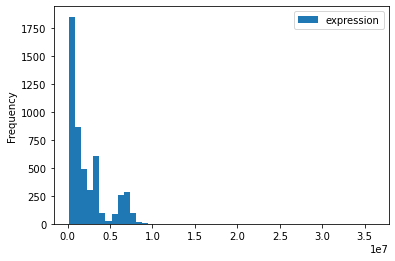

In [155]:
sum_counts.plot.hist(bins = 50)

Zoom in on the values which fall below 1e+07.

<AxesSubplot:ylabel='Frequency'>

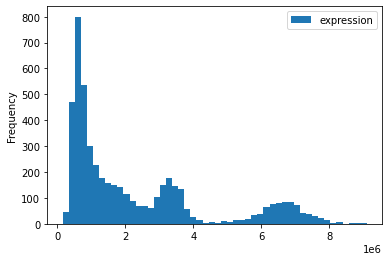

In [163]:
sum_counts[sum_counts.expression < 1e+07].plot.hist(bins = 50)

In [212]:
ACTB_counts = melted_liver_counts[melted_liver_counts.feature_name == 'ACTB']
ACTB_counts = ACTB_counts.set_axis(ACTB_counts.cell_id)
ACTB_counts = pd.DataFrame(ACTB_counts.expression)
ACTB_counts

,expression
cell_id,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,51.850670
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,21.424217
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,10.341937
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,41.449539
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,71.307213
...,...
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,3.025066
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,3.062052
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,10.507309


In [204]:
sum_counts.rename(columns = {'expression': 'sum_counts'}, inplace = True)

In [205]:
sum_counts

,sum_counts
cell_id,
AAACCCAAGCCGGAAT_TSP14_Liver_NA_10X_1_1,6.267566e+06
AAACCCAAGGTGCCTC_TSP14_Liver_NA_10X_1_1,3.614660e+06
AAACCCAAGTTGCTCA_TSP14_Liver_NA_10X_2_1,6.219432e+06
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,5.092642e+05
AAACCCATCTCTGGTC_TSP6_Liver_NA_10X_1_2,8.644483e+05
...,...
TTTGTTGGTTGTTGCA_TSP6_Liver_NA_10X_1_1,1.666753e+06
TTTGTTGTCCAAATGC_TSP6_Liver_NA_10X_1_1,5.439909e+05
TTTGTTGTCCCGAGGT_TSP14_Liver_NA_10X_1_1,2.494263e+06


In [210]:
merged_ACTB_sum_counts_df = pd.merge(ACTB_counts, sum_counts, on = 'cell_id', how = 'outer')
merged_ACTB_sum_counts_df.rename(columns = {'expression': 'ACTB_counts'}, inplace = True)
merged_ACTB_sum_counts_df

,ACTB_counts,sum_counts
cell_id,,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,51.850670,5.092642e+05
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,21.424217,1.186145e+06
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,10.341937,2.259464e+06
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,41.449539,5.751175e+05
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,71.307213,9.027531e+05
...,...,...
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,3.025066,3.515850e+06
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,3.062052,3.403235e+06
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,10.507309,3.681179e+06


<AxesSubplot:xlabel='sum_counts', ylabel='ACTB_counts'>

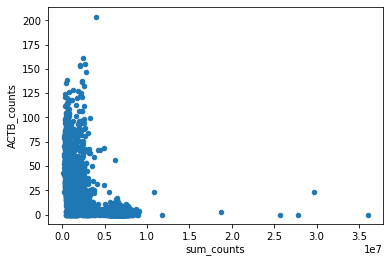

In [211]:
merged_ACTB_sum_counts_df.plot.scatter(x = 'sum_counts', y = 'ACTB_counts')

In [220]:
ACTB_cell_types = melted_liver_counts.set_axis(melted_liver_counts.cell_id)
ACTB_cell_types = ACTB_cell_types[ACTB_cell_types.feature_name == 'ACTB']
ACTB_cell_types = pd.DataFrame(ACTB_cell_types['cell_type'])

ACTB_cell_types

,cell_type
cell_id,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell
...,...
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid


In [221]:
merged_df = pd.merge(merged_ACTB_sum_counts_df, ACTB_cell_types, on = 'cell_id', how = 'outer')
merged_df

,ACTB_counts,sum_counts,cell_type
cell_id,,,
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,51.850670,5.092642e+05,macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,21.424217,1.186145e+06,monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,10.341937,2.259464e+06,endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,41.449539,5.751175e+05,macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,71.307213,9.027531e+05,liver dendritic cell
...,...,...,...
TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,3.025066,3.515850e+06,hepatocyte
TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,3.062052,3.403235e+06,hepatocyte
TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,10.507309,3.681179e+06,endothelial cell of hepatic sinusoid


<AxesSubplot:xlabel='sum_counts', ylabel='ACTB_counts'>

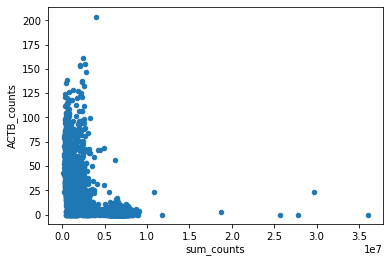

In [225]:
merged_ACTB_sum_counts_df.plot.scatter(x = 'sum_counts', y = 'ACTB_counts')

# PySpark
# Liver Implementation

In [2]:
import pyspark
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import arrays_zip, explode, map_keys, col
import pyspark.sql.functions as f
from pyspark.sql.types import FloatType

In [3]:
# Initialise Spark session
sparkConf = (
    SparkConf()
    .set('spark.driver.memory', '60g')
    .set('spark.executor.memory', '60g')
    .set('spark.driver.maxResultSize', '0')
    .set('spark.debug.maxToStringFields', '2000')
    .set('spark.sql.execution.arrow.maxRecordsPerBatch', '500000')
)
spark = SparkSession.builder.config(conf=sparkConf).master('local[*]').getOrCreate()

Setting default log level to "

# 1. Import data into Pyspark
## 1.1 Download data and read in data in .h5ad format

In [14]:
liver = sc.read_h5ad('tabula_sapiens_liver.h5ad')

In [3]:
liver

AnnData object with n_obs × n_vars = 5007 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'den

## 1.2 Convert anndata object to csv file for import into pyspark (slow)

In [6]:
#convert anndata object to csv file in order to read it into pyspark
liver.write_csvs('/home/jupyter/liver.csv', skip_data = False)

/home/jupyter/.local/lib/python3.10/site-packages/anndata/_core/aligned_mapping.py:232: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{key}{icolumn + 1}"] = column
/home/jupyter/.local/lib/python3.10/site-packages/anndata/_core/aligned_mapping.py:232: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{key}{icolumn + 1}"] = column
/home/jupyter/.local/lib/python3.10/site-packages/anndata/_core/aligned_mapping.py:232: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Technically we only need the .X, .obs and .var dataframes so we could write these as individual csv files as such to eliminate the runtime.

## 1.3 Read csv files into pyspark

Running `spark.read.option("header", True).csv('liver/X.csv')` threw an error because I think the csv file was either too large or the columns had no names as they were not saved as indexes.

In [21]:
liver_obs = spark.read.option("header", True).csv('liver/obs.csv')
liver_obs

DataFrame[cell_id: string, assay_ontology_term_id: string, donor_id: string, anatomical_information: string, n_counts_UMIs: string, n_genes: string, cell_ontology_class: string, free_annotation: string, manually_annotated: string, compartment: string, sex_ontology_term_id: string, disease_ontology_term_id: string, is_primary_data: string, organism_ontology_term_id: string, suspension_type: string, cell_type_ontology_term_id: string, tissue_ontology_term_id: string, development_stage_ontology_term_id: string, self_reported_ethnicity_ontology_term_id: string, cell_type: string, assay: string, disease: string, organism: string, sex: string, tissue: string, self_reported_ethnicity: string, development_stage: string]

In [22]:
liver_var = spark.read.option("header", True).csv('liver/var.csv')
liver_var

DataFrame[ensemblid: string, feature_type: string, highly_variable: string, means: string, dispersions: string, dispersions_norm: string, mean: string, std: string, ensembl_version: string, feature_is_filtered: string, feature_name: string, feature_reference: string, feature_biotype: string]

## 1.5 Create cell x gene count matrix

In [15]:
#convert count sparse matrix into pandas dataframe
liver_X_df = pd.DataFrame.sparse.from_spmatrix(liver.X)

liver_X_df

,0,1,2,3,4,5,6,7,8,9,...,58594,58595,58596,58597,58598,58599,58600,58601,58602,58603
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.000000,0.000000,0.0,3.066113,1.735281,0.000000,4.651200,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.000000,0.000000,0.0,3.011087,0.000000,0.000000,4.890568,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.000000,0.000000,0.0,3.832069,1.114132,0.000000,4.693941,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.000000,0.000000,0.0,2.975372,0.000000,0.000000,4.572667,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.000000,0.000000,0.0,3.143889,0.000000,0.000000,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.577865,1.506503,0.792537,0.0,3.344307,1.543429,0.883882,4.122873,0.0,2.078453
5003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.099157,0.000000,1.211337,0.0,2.707354,0.939532,4.610079,3.635269,0.0,1.836136
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.973971,0.0,0.000000
5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.335147,0.000000,0.000000,0.0,1.490789,0.000000,0.000000,2.239632,0.0,0.000000


In [4]:
#add ensemblid to genes
ensemblid = liver.var.index.values
liver_X_df = liver_X_df.set_axis(ensemblid, axis = 1)

**This step could have been done using the feature_names as done above however for clarity ensemblid has been used**

In [5]:
#add cell_id and cell_type
cell_id = liver.obs.index.values
cell_type = liver.obs['cell_type'].values.to_list()
liver_X_df.insert(0, 'cell_id', cell_id)
liver_X_df.insert(1, 'cell_type', cell_type)

/tmp/ipykernel_4524/3819472889.py:3: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cell_type = liver.obs['cell_type'].values.to_list()


In [7]:
liver_X_df

,cell_id,cell_type,ENSG00000223972,ENSG00000227232,ENSG00000278267,ENSG00000243485,ENSG00000284332,ENSG00000237613,ENSG00000268020,ENSG00000240361,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.000000,0.000000,0.0,3.066113,1.735281,0.000000,4.651200,0.0,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.000000,0.000000,0.0,3.011087,0.000000,0.000000,4.890568,0.0,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.000000,0.000000,0.0,3.832069,1.114132,0.000000,4.693941,0.0,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.000000,0.000000,0.0,2.975372,0.000000,0.000000,4.572667,0.0,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.000000,0.000000,0.0,3.143889,0.000000,0.000000,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.577865,1.506503,0.792537,0.0,3.344307,1.543429,0.883882,4.122873,0.0,2.078453
5003,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.099157,0.000000,1.211337,0.0,2.707354,0.939532,4.610079,3.635269,0.0,1.836136
5004,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.390459,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.973971,0.0,0.000000
5005,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,mature NK T cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.335147,0.000000,0.000000,0.0,1.490789,0.000000,0.000000,2.239632,0.0,0.000000


## 1.6 Reformat dataframe in long format for implementation in pyspark

In [21]:
cols = liver_X_df.columns[2:]

melted_liver_X_df = pd.melt(liver_X_df, id_vars = ['cell_id', 'cell_type'], 
                            value_vars = cols, 
                           var_name = 'ensemblid', 
                           value_name = 'expression')

In [22]:
melted_liver_X_df

,cell_id,cell_type,ensemblid,expression
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,ENSG00000223972,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,ENSG00000223972,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,ENSG00000223972,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,ENSG00000223972,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,ENSG00000223972,0.000000
...,...,...,...,...
293430223,TTTGATCCATCGGCCA_TSP14_Liver_NA_10X_2_1,hepatocyte,ENSG00000210196,2.078453
293430224,TTTGGAGTCAGTCTTT_TSP14_Liver_NA_10X_2_1,hepatocyte,ENSG00000210196,1.836136
293430225,TTTGGTTGTCACTCGG_TSP14_Liver_NA_10X_2_1,endothelial cell of hepatic sinusoid,ENSG00000210196,0.000000
293430226,TTTGTTGAGGACTGGT_TSP14_Liver_NA_10X_2_1,mature NK T cell,ENSG00000210196,0.000000


This data frame has 293 million rows and this is for a dataset with only 5007 cells and 58,606 genes.

## 1.7 Change sparse expression column to dense

Need to do this in order for the data to be saved and read as a parquet file.

In [23]:
melted_liver_X_df.dtypes

cell_id                   object
cell_type                 object
ensemblid                 object
expression    Sparse[float32, 0]
dtype: object

In [24]:
melted_liver_X_df.expression = melted_liver_X_df.expression.values.to_dense()

In [25]:
melted_liver_X_df.dtypes

cell_id        object
cell_type      object
ensemblid      object
expression    float32
dtype: object

## 1.8 Saving melted df as a parquet file and reading into pyspark

In [26]:
melted_liver_X_df.to_parquet('liver/melted_liver_X_df.parquet')

In [12]:
liver_X = spark.read.parquet('liver/melted_liver_X_df.parquet')

# 2. Querying Data
## 2.1 Visualise liver_X schema

In [5]:
liver_X.printSchema()

root
 |-- cell_id: string (nullable = true)
 |-- cell_type: string (nullable = true)
 |-- ensemblid: string (nullable = true)
 |-- expression: float (nullable = true)



In [6]:
liver_X.show()

+--------------------+--------------------+---------------+----------+
|             cell_id|           cell_type|      ensemblid|expression|
+--------------------+--------------------+---------------+----------+
|AAACCCACACTCCTGT_...|          macrophage|ENSG00000223972|       0.0|
|AAACGAAGTACCAGAG_...|            monocyte|ENSG00000223972|       0.0|
|AAACGCTCAACGGCTC_...|endothelial cell ...|ENSG00000223972|       0.0|
|AAAGAACAGCCTCTTC_...|          macrophage|ENSG00000223972|       0.0|
|AAAGAACGTAGCACAG_...|liver dendritic cell|ENSG00000223972|       0.0|
|AAAGAACGTTTCTTAC_...|          macrophage|ENSG00000223972|       0.0|
|AAAGAACTCCTTATGT_...|    mature NK T cell|ENSG00000223972|       0.0|
|AAAGAACTCTTCTCAA_...|          macrophage|ENSG00000223972|       0.0|
|AAAGGATAGTCGAAAT_...|            monocyte|ENSG00000223972|       0.0|
|AAAGGATCAAATCAGA_...|endothelial cell ...|ENSG00000223972|       0.0|
|AAAGGATCACATGAAA_...|          macrophage|ENSG00000223972|       0.0|
|AAAGG

## 2.2 Calculate median gene expression in each cell type
### 2.2.1 Define find_median function

In [24]:
#function taken from https://www.educba.com/pyspark-median/
def find_median(values_list):
    try:
        median = np.median(values_list)
        return float(median)
    except Exception:
        return None

In [25]:
#register user-defined function (UDF) and data type needed for this
med_find = f.udf(find_median, FloatType())

### 2.2.2 Apply find_median UDF to grouped data

In [9]:
agg_liver_X = (
    liver_X
    .groupby('cell_type', 'ensemblid')
    .agg(
        f.collect_list('expression')
        .alias('expression'))
    .withColumn('median_expression', med_find('expression'))
    )

In [10]:
agg_liver_X.show()

+---------+---------------+--------------------+-----------------+
|cell_type|      ensemblid|          expression|median_expression|
+---------+---------------+--------------------+-----------------+
|   T cell|ENSG00000001561|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000002745|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000003096|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000003147|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000004455|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000005102|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000005175|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000005379|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000005471|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000006210|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000006555|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|ENSG00000006659|[0.0, 0.0, 0.0, 0...|              

# All Cells

In [19]:
import pyspark
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import arrays_zip, explode, map_keys, col
import pyspark.sql.functions as f
from pyspark.sql.types import FloatType

In [20]:
# Initialise Spark session
sparkConf = (
    SparkConf()
    .set('spark.driver.memory', '60g')
    .set('spark.executor.memory', '60g')
    .set('spark.driver.maxResultSize', '0')
    .set('spark.debug.maxToStringFields', '2000')
    .set('spark.sql.execution.arrow.maxRecordsPerBatch', '500000')
)
spark = SparkSession.builder.config(conf=sparkConf).master('local[*]').getOrCreate()

# 1. Import data into PySpark
## 1.1 Download data and read in .h5ad format

In [5]:
all_cells = sc.read_h5ad('tabula_sapiens_all_cells.h5ad')

In [5]:
all_cells

AnnData object with n_obs × n_vars = 483152 × 58604
    obs: 'tissue_in_publication', 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_id_c

## 1.2 Create cell x gene count matrix as dataframe

In [6]:
#convert count sparse matrix to pandas dataframe
all_cells_X_df = pd.DataFrame.sparse.from_spmatrix(all_cells.X)

In [7]:
#add ensemblid to genes
ensemblid = all_cells.var.index.values
all_cells_X_df = all_cells_X_df.set_axis(ensemblid, axis = 1)

In [8]:
#add cell_id and cell_type as columns
cell_id = all_cells.obs.index.values
cell_type = all_cells.obs['cell_type'].values.to_list()
all_cells_X_df.insert(0, 'cell_id', cell_id)
all_cells_X_df.insert(1, 'cell_type', cell_type)

/tmp/ipykernel_2390/1594358502.py:3: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cell_type = all_cells.obs['cell_type'].values.to_list()


In [9]:
all_cells_X_df

,cell_id,cell_type,ENSG00000223972,ENSG00000227232,ENSG00000278267,ENSG00000243485,ENSG00000284332,ENSG00000237613,ENSG00000268020,ENSG00000240361,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
0,AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.514050,0.0,0.0,0.0,3.066113,1.735281,0.0,4.651200,0.0,0.000000
1,AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,monocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.493524,0.0,0.0,0.0,3.011087,0.000000,0.0,4.890568,0.0,0.000000
2,AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,endothelial cell of hepatic sinusoid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.611789,0.0,0.0,0.0,3.832069,1.114132,0.0,4.693941,0.0,0.000000
3,AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,macrophage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.344065,0.0,0.0,0.0,2.975372,0.000000,0.0,4.572667,0.0,0.000000
4,AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,liver dendritic cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.443695,0.0,0.0,0.0,3.143889,0.000000,0.0,4.533354,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483147,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.455786,0.0,0.0,0.0,2.986555,0.760420,0.0,2.158757,0.0,0.000000
483148,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.292184,0.0,0.0,0.0,3.560022,2.219024,0.0,3.486868,0.0,0.000000
483149,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,endothelial cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.031555,0.0,0.0,0.0,4.286012,2.549905,0.0,3.976863,0.0,5.355007
483150,TSP2_Vasculature_aorta_SS2_B114577_B133059_End...,endothelial cell,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.405994,0.0,0.0,0.0,4.814424,4.026218,0.0,3.945915,0.0,0.000000


## 1.3 Reformat dataframe from wide to long format

**Unable to do this step with all cells as it is too large for the python kernel to process**

In [ ]:
cols = all_cells_X_df.columns[2:]
melted_all_cells_X_df = pd.melt(all_cells_X_df, 
                                id_vars = ['cell_id', 'cell_type'], 
                               value_vars = cols, 
                               var_name = 'ensemblid', 
                               value_name = 'expression')

# Verifying Pandas Median Data with PySpark Median Data

In [14]:
liver = sc.read_h5ad('tabula_sapiens_liver.h5ad')
liver_X_df = pd.DataFrame.sparse.from_spmatrix(liver.X)

gene_name = liver.var['feature_name'].values.to_list()
liver_X_df = liver_X_df.set_axis(gene_name, axis = 1)

cell_id = liver.obs.index.values
cell_type = liver.obs['cell_type'].values.to_list()
liver_X_df.insert(0, 'cell_id', cell_id)
liver_X_df.insert(1, 'cell_type', cell_type)

/tmp/ipykernel_13744/4132586194.py:4: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  gene_name = liver.var['feature_name'].values.to_list()
/tmp/ipykernel_13744/4132586194.py:8: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cell_type = liver.obs['cell_type'].values.to_list()


In [15]:
cols = liver_X_df.columns[2:]

melted_liver_X_df = pd.melt(liver_X_df, id_vars = ['cell_id', 'cell_type'], 
                            value_vars = cols, 
                           var_name = 'gene_name', 
                           value_name = 'expression')

In [16]:
melted_liver_X_df.expression = melted_liver_X_df.expression.values.to_dense()

In [17]:
median_liver_X = melted_liver_X_df.groupby(['cell_type', 'gene_name']).median('expression')

median_liver_X

expression
cell_type   gene_name                          
T cell      5S_rRNA_ENSG00000276861         0.0
            5S_rRNA_ENSG00000277411         0.0
            5S_rRNA_ENSG00000277488         0.0
            5S_rRNA_ENSG00000285609         0.0
            5S_rRNA_ENSG00000285626         0.0
...                                         ...
plasma cell bP-2189O9.5                     0.0
            hsa-mir-1253                    0.0
            hsa-mir-423                     0.0
            snoZ196                         0.0
            yR211F11.2                      0.0

[761852 rows x 1 columns]

In [45]:
#genes with a non-zero median expression using pandas dataframe
median_liver_X[(median_liver_X.expression != 0)]

expression
cell_type   gene_name            
T cell      AAK1         2.227230
            ACAP1        1.745173
            ACTB         2.743471
            ACTG1        2.151516
            ACTR2        1.604836
...                           ...
plasma cell ZNF207       0.932977
            ZNF292       0.349221
            ZNF706       1.314754
            ZNHIT1       1.012897
            ZRANB2       1.448085

[12450 rows x 1 columns]

*Out of 761,852 median scores only 12,450 are non-zero.*

In [18]:
melted_liver_X_df.to_parquet('liver/gene_name_liver_X_df.parquet')

In [21]:
liver_X = spark.read.parquet('liver/gene_name_liver_X_df.parquet')

In [ ]:
#function taken from https://www.educba.com/pyspark-median/
def find_median(values_list):
    try:
        median = np.median(values_list)
        return float(median)
    except Exception:
        return None

In [ ]:
#register user-defined function (UDF) and data type needed for this
med_find = f.udf(find_median, FloatType())

In [26]:
agg_gene_name_liver_X = (
    liver_X
    .groupby('cell_type', 'gene_name')
    .agg(
        f.collect_list('expression')
        .alias('expression'))
    .withColumn('median_expression', med_find('expression'))
    )

In [27]:
agg_gene_name_liver_X.show()

+---------+--------------------+--------------------+-----------------+
|cell_type|           gene_name|          expression|median_expression|
+---------+--------------------+--------------------+-----------------+
|   T cell|5_8S_rRNA_ENSG000...|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|             A2M-AS1|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|               A2ML1|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|           A2ML1-AS1|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|               A4GNT|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|             AADACL2|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|             AADACL3|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|                AARD|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell|            AASDHPPT|[0.0, 3.559449, 0...|              0.0|
|   T cell|                AASS|[0.0, 0.0, 0.0, 0...|              0.0|
|   T cell| ABC10-44372100G24.1|[0.0, 0.0, 0.0, 0...|           

In [49]:
#check median expression for gene ACTG1 in T cell and ZNF706 in plasma cell
agg_gene_name_liver_X.createOrReplaceTempView("TAB")
spark.sql("SELECT * FROM TAB WHERE " + "gene_name IN ('ACTG1', 'ZNF706')").show()

+--------------------+---------+--------------------+-----------------+
|           cell_type|gene_name|          expression|median_expression|
+--------------------+---------+--------------------+-----------------+
|         erythrocyte|   ZNF706|[0.0, 0.0, 0.0, 0...|              0.0|
|          macrophage|   ZNF706|[0.0, 2.5432155, ...|        1.1194693|
|            monocyte|   ZNF706|[0.0, 1.798161, 2...|        1.3397723|
|          fibroblast|   ZNF706|[1.0836954, 0.0, ...|       0.79891676|
|    endothelial cell|   ZNF706|[0.0, 1.2491742, ...|        1.2388797|
|liver dendritic cell|   ZNF706|[1.4844936, 0.0, ...|        1.4015207|
|         plasma cell|   ZNF706|[3.2332926, 2.882...|        1.3147542|
|          neutrophil|   ZNF706|[0.0, 0.0, 0.0, 0...|              0.0|
|intrahepatic chol...|   ZNF706|[3.1335206, 0.0, ...|        1.6856848|
|    mature NK T cell|   ZNF706|[0.0, 2.955844, 1...|              0.0|
|endothelial cell ...|   ZNF706|[2.5447338, 1.233...|           

The ACTG1 gene within the T cell cell_type has a median expression of 2.151516 when using the pandas.df.median() function and here we see with the pyspark implementation the median is 2.1515164 which is the same just with one extra decimal place. Similarly with ZNF706 the plasma cell in the pandas df has 1.314754 whilst pyspark is the same with an extra decimal place 1.3147542.

Actin beta (ACTB), its Ensembl ID is ENSG00000075624. It is a housekeeping gene and should be broadly expressed. So for all cell types, we definitely expect to see a non-zero median value

In [52]:
spark.sql("SELECT * FROM TAB WHERE " + "gene_name IN ('ACTB')").show()

+--------------------+---------+--------------------+-----------------+
|           cell_type|gene_name|          expression|median_expression|
+--------------------+---------+--------------------+-----------------+
|    endothelial cell|     ACTB|[2.321531, 3.5809...|        3.3048465|
|              T cell|     ACTB|[3.4181693, 3.085...|        2.7434707|
|          fibroblast|     ACTB|[3.5878563, 3.483...|        3.2087526|
|          neutrophil|     ACTB|[3.5005133, 2.190...|        2.9636347|
|intrahepatic chol...|     ACTB|[2.3553882, 3.768...|         1.904201|
|    mature NK T cell|     ACTB|[3.9262035, 2.924...|         3.639651|
|            monocyte|     ACTB|[3.1101415, 4.317...|        3.9090247|
|          macrophage|     ACTB|[3.9674704, 3.748...|        3.6997802|
|          hepatocyte|     ACTB|[1.1648109, 0.588...|        1.3579696|
|         plasma cell|     ACTB|[3.7846367, 3.829...|        1.8998551|
|         erythrocyte|     ACTB|[0.965919, 3.9693...|        1.5

In [53]:
spark.sql("SELECT * FROM TAB WHERE " + "gene_name IN ('HLA-A')").show()

+--------------------+---------+--------------------+-----------------+
|           cell_type|gene_name|          expression|median_expression|
+--------------------+---------+--------------------+-----------------+
|endothelial cell ...|    HLA-A|[0.7712685, 2.358...|         1.911698|
|    mature NK T cell|    HLA-A|[2.5888026, 2.128...|        1.9880068|
|          hepatocyte|    HLA-A|[0.0, 0.63337713,...|              0.0|
|         erythrocyte|    HLA-A|[0.0, 0.11222476,...|              0.0|
|              T cell|    HLA-A|[1.245452, 2.1019...|        2.3811917|
|    endothelial cell|    HLA-A|[2.948263, 1.7976...|        2.3297784|
|liver dendritic cell|    HLA-A|[1.8237816, 1.574...|        1.4934633|
|          neutrophil|    HLA-A|[0.0, 1.4698974, ...|              0.0|
|          macrophage|    HLA-A|[2.379818, 2.3616...|        1.8383048|
|         plasma cell|    HLA-A|[2.056801, 0.9138...|        1.2146106|
|          fibroblast|    HLA-A|[0.0, 0.0, 2.0686...|        1.0

# ACTB Normalised Expression in Hepatocytes

## Scaled

In [59]:
#obtain ACTB data for hepatocytes
ACTB_hepatocytes_scaled = liver_X_df[liver_X_df['cell_type'] == 'hepatocyte']['ACTB']

ACTB_hepatocytes_scaled

26      1.164811
85      0.588775
114     0.000000
159     0.000000
203     0.932045
          ...   
5000    1.611552
5001    1.704657
5002    1.392541
5003    1.401688
5006    0.000000
Name: ACTB, Length: 1558, dtype: Sparse[float64, 0]

<AxesSubplot:ylabel='Frequency'>

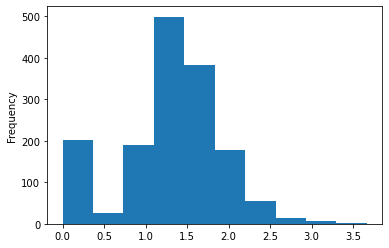

In [60]:
ACTB_hepatocytes_scaled.plot.hist()